#**THE SPARKS FOUNDATION**

###**TASK 1 - Prediction using Supervised ML**


To Predict the percentage of a student based on the no. of study hours.

###**Author :- Saloni**

In [21]:

# importing the libraries required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [22]:

#Reading the Data
Data = pd.read_csv("http://bit.ly/w-data")
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:

#Checking if null values are present in data
Data.isnull() 

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


###**As there are no null values so there is no need to perform Data Cleaning, We will move to the visualization of the data**

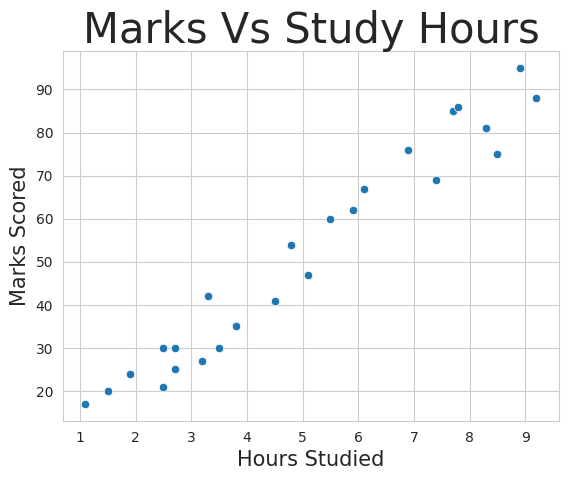

In [24]:

sns.set_style("whitegrid")
sns.scatterplot(x=Data["Hours"],y=Data["Scores"])
plt.title('Marks Vs Study Hours',size=30)
plt.xlabel("Hours Studied",size=15)
plt.ylabel("Marks Scored",size=15)
plt.show()

###**From the above graph it is observed that there is presence of correlation between the marks scored by the students and no. of hours they studied, to identify the correlation we will plot a Regression Line in the above graph**

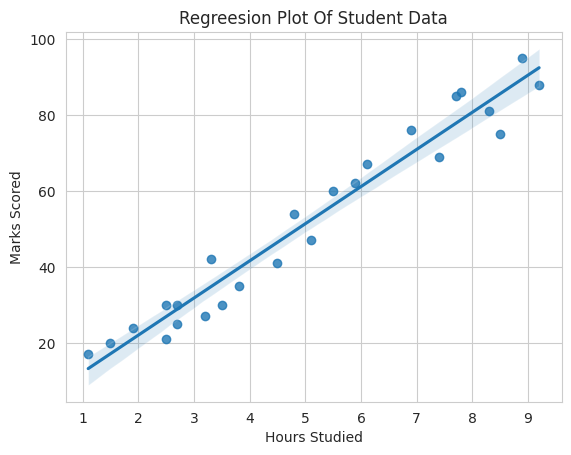

In [25]:
sns.regplot(x=Data["Hours"],y=Data["Scores"])
plt.title("Regreesion Plot Of Student Data")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.show()

###**To Identify the Correlation between the Hours Studied by the Student and Marks Scored by the Student we use correlation function**

In [26]:

Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


we can see the columns (or) variables are positively correlated

##**Training the model**

###**1) Spliting the Data**

In [27]:

# Defining x and y from the Data
x = Data.iloc[:,:-1].values
y = Data.iloc[:,1].values


# spliting the data set into Training dataset and Testing dataset
Train_x,Test_x,Train_y,Test_y = train_test_split(x,y,random_state=0)
     

###**2) Fitting the Data into the Model**

In [28]:

regression = LinearRegression()
regression.fit(x,y)
print("Model Training is now completed.")
     

Model Training is now completed.


###**Predicting the pecentage of Marks**

In [29]:

predicting_y = regression.predict(Test_x)
prediction = pd.DataFrame({'Hours Studied': [i[0] for i in Test_x], 'Predicted Marks': [k for k in predicting_y]})
prediction

,Hours Studied,Predicted Marks
0,1.5,17.147378
1,3.2,33.766244
2,7.4,74.824618
3,2.5,26.923182
4,5.9,60.160913
5,3.8,39.631726
6,1.9,21.057700


###**Comparing the Predicted Marks with the Actual Marks**

In [30]:

compare_scores = pd.DataFrame({'Actual Marks': Test_y, 'Predicted Marks': predicting_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913
5,35,39.631726
6,24,21.057700


###**Let us see the Predicted Marks and the Actual Marks in a single DataFrame**

In [31]:
Scores_together = pd.DataFrame({'Actual Marks':Test_y , 'Predicted Marks': predicting_y})
     

In [32]:

Scores_together

,Actual Marks,Predicted Marks
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913
5,35,39.631726
6,24,21.057700


###**Visualizing the Predicted Score and Actual Score of the Students**

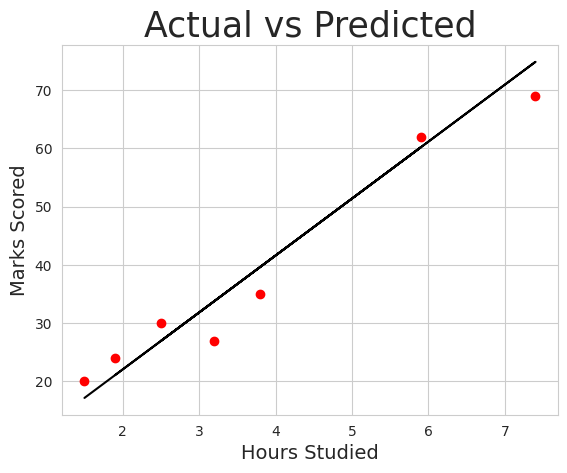

In [33]:

plt.scatter(x=Test_x, y=Test_y, color='red')
plt.plot(Test_x, predicting_y, color='Black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Scored', size=14)
plt.xlabel('Hours Studied', size=14)
plt.show()

###**Accuracy of the Model**

In [34]:

error = mean_absolute_error(Test_y,predicting_y)
print("Accuracy of the Model =",100-error)
print("Error in the Model =",error)

Accuracy of the Model = 96.0095120841894
Error in the Model = 3.9904879158106015


###**The mean absolute error of the Trained Model is 4%, that means if mean absolute error of a model is < 10% ,Then the model is Good for forecasting the Data**

###**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [35]:
hours = [[9.25]]  
solution = regression.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(round(solution[0],3))) 

Number of hours = [[9.25]]
Prediction Score = 92.91


###**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.91 marks.**